# Analysis of the Palmer Penguins Data Set
***

Author: Irene Kilgannon

This notebook contains my analysis of the palmer penguins data set. The palmer penguins data set contains data measurements for three different penguin species, the Chinstrap, Gentoo and Adélie penguin. The data was collected between 2007 - 2009 by Dr. Kristen Gorman with the [Palmer Station Long Term Ecological Research Program](https://lternet.edu/site/palmer-antarctica-lter/) on three islands in the Palmer Archipelago, Antarctica. The Palmer archipelago is named after [Nathaniel Palmer](https://en.wikipedia.org/wiki/Nathaniel_Palmer), an American explorer who explored this part of the Antartica in 1820.

![The Palmer Penguins. Artwork by @allison_horst](https://sebastiancallh.github.io/ox-hugo/palmer-penguins.png)

_The Palmer Penguins, artwork by @allison_horst_






According to [AllisonHorst.github.io](https://github.com/allisonhorst/palmerpenguins/blob/main/README.md) "the goal of the palmerpenguins is to provide a great dataset for data exploration and visualization, as an alternative to iris". In this [article](https://www.researchgate.net/profile/Kristen-B-Gorman/publication/362573623_Palmer_Archipelago_Penguins_Data_in_the_palmerpenguins_R_Package_-_An_Alternative_to_Anderson's_Irises/links/63100bec1ddd44702125ddbc/Palmer-Archipelago-Penguins-Data-in-the-palmerpenguins-R-Package-An-Alternative-to-Andersons-Irises.pdf) Horst et al. discuss the merits of using their palmer penguins data set over Fisher's iris data set. One of the key points they make is that the palmer penguins data set is a more realistic data set with missing values. The iris data set has no missing values so students using the iris data set are unfortunately not learning one of the key skills in data analysis - cleaning and processing the data.

The data set is used by students and educators so students can learn how to:
* clean and preprocess data
* perform exploratory data analysis
* visualise data
* perform comparative analysis and clustering of data
* machine learning by [classification](https://medium.com/@cleonard_85587/classification-penguins-species-on-python-b494fd92e686) and regression. 

A number of different programming languages are widely used to analyse the data. These are [python](https://www.youtube.com/watch?v=uiYgZomY-v4&t=2970s), [R](https://www.youtube.com/watch?v=KxfC_gzTBVg) and [Julia](https://www.youtube.com/watch?v=lflrmExE3gY&t=0s). I have also found some visualisation of the data set using [tableau](https://public.tableau.com/app/profile/kushie/viz/MOMWeek28-ThePalmerPenguins/PalmerPenguins). Tableau is not a programming language but is a data visualisation tool that does not involve any coding. This project will be written in python. 

# Table of Contents

The tasks:
    import the data set (https://vscode.dev/github/IreneKilgannon/DataAnalytics/blob/main/penguins.ipynb#C6:L6)
    give an overview of the data set and the variables it contains (https://vscode.dev/github/IreneKilgannon/DataAnalytics/blob/main/penguins.ipynb#C9:L1)
    suggest the types of variables in the data set 
    create a bar chart
    create a histogram
    
To DO list:

Show research about plots etc. Add comments about why i plotted them the way I did. Blurb about the research. Don't just link

comment on the results of the plots. compare with other plots.




## The Tasks

### Import Modules
***

Four modules are required for this analysis:
* pandas - for manipulating data and for performing data analysis
* numpy - performs a wide variety of mathematical calculations on arrays
* matplotlib.pyplot - to create plots
* seaborn - to create plots

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import matplotlib.pylab
import matplotlib.pylab as plt

# Import seaborn
import seaborn as sns

### Import the data set
***

The data set was imported as a csv file from [Seaborn Data](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). The original raw data set is available on Alison Horst's [GitHub](https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins_raw.csv).

The data set from seaborn has been processed to remove extraneous information such as any clutch size, blood isotope ratios and other additional information that is not required for this analysis.

In [2]:
# Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [3]:
# Have a look. Check that the file has loaded correctly.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Overview of the data set and the variables it contains.
***

In [4]:
# df.head() prints out the first five rows of the csv file.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
# Counts the number of rows and columms in the data set.
df.shape

(344, 7)

In [6]:
# df.info() gives concise information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
# A count of the number of missing variables.
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
# Unique names in the species column.
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
# Unique values in the island column.
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
# Unique names in the sex column.
df["sex"].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

__Summary Statistics for the Palmer penguins data set__

In [11]:
# Describe the data set. Summary statistics about the data file. 
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [12]:
# Renaming and reorganising the dataset so that the species column is now the index column. This will make slicing using loc() easier.
penguins = df.set_index("species")
penguins.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [13]:
# Create an Adelie penguin dataframe and summary statistics for the Adelie penguins
adelie = penguins.loc[['Adelie']]
adelie.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [14]:
# Create an Chinstrap penguin dataframe and summary statistics for the Chinstrap penguins.
chinstrap = penguins.loc[['Chinstrap']]
chinstrap.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


In [15]:
# Create an Gentoo penguin dataframe and summary statistics for the Gentoo penguins.
gentoo = penguins.loc[['Gentoo']]
gentoo.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


**Overview of the data set and the variables within it.**

The data set has 344 rows and seven columns. Each row is an individual penguin and for each penguin there are seven possible variables.

The seven variables in the dataset are:
* species
* island
* bill length in mm
* bill depth in mm
* flipper length in mm
* the body mass in g
* the sex of the penguin.

Three penguin species were studied - the Adélie, Chinstrap and Gentoo penguin. They were found on three islands in the Palmer Archipelago, Antarctica - Dream Island, Torgerson Island and Biscoe Point, which are referred to as Dream, Torgerson and Biscoe in the data set.


<center><img src="islands.png" alt="image" style = "width:600px; height=auto"></center>


_Image credit Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081_


This artwork by Allison Horst nicely depicts the difference between the bill length and bill depth and how they were measured. Please note that in the original data set the word culmen was used in place of bill. 


![Bill length and bill depth](https://miro.medium.com/v2/resize:fit:640/format:webp/1*WSb-Y9xb3YSx9owW7_JuMw.png)

_Penguin Bills, artwork by @allison_horst_


[Gorman et al](https://doi.org/10.1371/journal.pone.0090081) states that the bill length and bill depth were measured in mm to an accuracy of 0.1mm using a dial calipers while flipper length was measured in mm using a ruler to an accuracy of 1mm. The body mass of the penguins was measured in grams. The sex of the penguins was determined by molecular analysis of a blood sample from the penguin. 

There are no variables missing from two columns, the species and island columns. The other columns have some missing data. The sex column has the most missing values with 11 instances of missing data. Bill length, bill depth, flipper length and body mass all have two pieces of missing data each.

### Data types in the data set.

When a data set is loaded pandas automatically assigns what it thinks is the best data type for the data. Numerical data are categorised as integers or floats. Non-numerical data are automatically assigned as objects, which is equivalent to strings in python. 

Pandas data type names have a slightly different name compared to their python data types name, as shown in the table below.

| Python | Pandas |
|--------|--------|
| string| object|
|float|float64|
|integer|int64|
|bool|bool|
| - |category|
|-|datetime64|

In [16]:
# Check the data type of the variables.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

__Data types__

The bill length, bill depth, flipper length and body mass were given the data type float64 by pandas. Species, island and sex are all non-numerical data and were assigned the object data type.

Bill length and bill depth were measured in mm with the result recorded to one decimal place. These are floating point numbers and pandas has correctly assigned them to the data type of float64.

After reviewing the raw data file I noticed that while flipper length and body mass were measured in mm, they were not measured to the same degree of accuracy as the bill measurements and were recorded as whole numbers i.e. integers. The correct data type for these two columns should be int64.

After completing the data camp course, [working with categorical data](https://app.datacamp.com/learn/courses/working-with-categorical-data-in-python) I realised if a column contains a limited and fixed number of non-numerical values it should, if possible be assigned to the pandas data type of [category](https://pandas.pydata.org/docs/user_guide/categorical.html). There is no corresponding data type in python. For large data sets changing the data type to category could potentially result in significant memory savings.

I had originally assumed that the object data type applied to species, island and sex was correct however these three columns should be assigned to the data type of category as they all have limited, fixed values so I will change their data type to category using the [astype() method](https://www.geeksforgeeks.org/python-pandas-dataframe-astype/).

In [17]:
type(np.nan)

float

__Dealing with missing data__

Before the data type of the flipper length, body mass and sex columns can be changed the missing values, NaN in these columns needs to be dealt with. The astype method will not work to change the data type of the columns with NaN values as NaN is always assigned as a floating point number data type.

Chapter 5 in the book, Pandas for Everyone: Python data analysis by  Daniel Y Chen the missing data can be handled by:
* dropping the rows with missing data with the [dropna method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
* replacing the missing data using the [fillna method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html). The fillna can be used to fill in the missing values based on other values perhaps by replacing the NaN with the mean that column or by forward or back filling using values. 

First look at the rows with missing data to decide which option to take.

In [18]:
# Find the rows with missing data
# Save the results as a dataframe - it might be useful.
df_nan = df[df.isnull().any(axis = 1)]
df_nan

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [42]:
df.groupby('species')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm' , 'body_mass_g']].agg([np.mean, np.median, min, max])

bill_length_mm                    bill_depth_mm                     \
                    mean median   min   max          mean median   min   max   
species                                                                        
Adelie         38.823973  38.85  32.1  46.0     18.347260  18.40  15.5  21.5   
Chinstrap      48.833824  49.55  40.9  58.0     18.420588  18.45  16.4  20.8   
Gentoo         47.568067  47.40  40.9  59.6     14.996639  15.00  13.1  17.3   

          flipper_length_mm                   body_mass_g                      
                       mean median  min  max         mean  median   min   max  
species                                                                        
Adelie           190.102740  190.0  172  210  3706.164384  3700.0  2850  4775  
Chinstrap        195.823529  196.0  178  212  3733.088235  3700.0  2700  4800  
Gentoo           217.235294  216.0  203  231  5092.436975  5050.0  3950  6300

Decided to drop all the rows with Nan's. Ideally I would have used fillna but as I currently have no method to predict the sex of the penguins based on the other variables I decided against it. 

It is worth noting that if fillna was used to replace the missing values in the numerical variable columns it would need to calculated by species. For example in the overall summary statistics for the flipper length column the mean is 200.915205mm but the above table shows that each of the species has a distinctly different mean for the flipper length.

In [39]:
# Check for duplicated rows.
df.duplicated().sum()

0

In [31]:
# Drop rows with NaN
df.dropna(inplace=True)

In [32]:
# Check to see if the rows with missing values in the flipper length and body mass columns have been dropped.
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [33]:
# Change the data type of the species, island and sex columns to category.
df[['species', 'island', 'sex']] = df[['species', 'island', 'sex']].astype('category')


In [34]:
# Change the flipper length and body mass columns to the int data type.
df[['flipper_length_mm', 'body_mass_g']] = df[['flipper_length_mm', 'body_mass_g']].astype('int64')

In [35]:
# Check to see if the data type changes have been applied. 
df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm       int64
body_mass_g             int64
sex                  category
dtype: object

For consistancy I would like the formatting of the sex column to be in line with the formatting of the species and island columns i.e title case.

In [36]:
# Changing the format of the sex column.
df['sex'] = df['sex'].str.title()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18.0,195,3250,Female
4,Adelie,Torgersen,36.7,19.3,193,3450,Female
5,Adelie,Torgersen,39.3,20.6,190,3650,Male


### Bar chart of the penguin population on each island.
***

Task: Create a bar chart of an appropriate variable.

From [geeksforgeeks.com](https://www.geeksforgeeks.org/bar-plot-in-matplotlib/) "a bar chart is used to describe the comparisons between discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured value". A bar chart could be used to examine the penguin population on each island so the x-axis will be the islands as it has discrete categories and the y-axis will be the penguin population.

In [43]:
# Penguin population on each island.
df['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

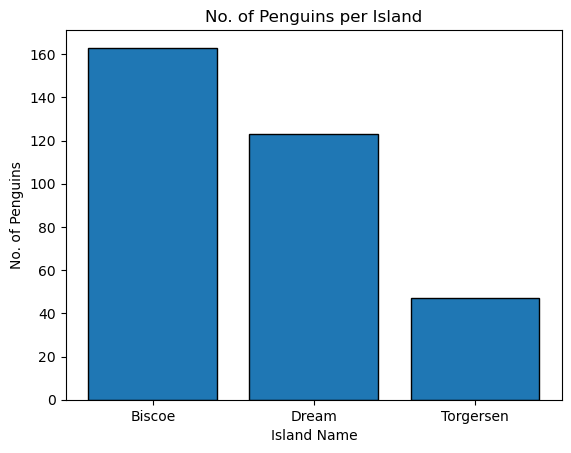

In [44]:
# Plotting a bar chart of the penguin population on each island.

# Set the x-axis to the island names.
xpoints = np.array(["Biscoe", "Dream", "Torgersen"])

# Set the y-axis to the count of each penguin per island.
ypoints = np.array(df['island'].value_counts())

# Plot the bar chart.
plt.bar(xpoints, ypoints, edgecolor = "black")

# Set the labels for the x-axis, y-axis and title of the plot.
plt.xlabel("Island Name")
plt.ylabel("No. of Penguins")
plt.title("No. of Penguins per Island")

# Display the plot
plt.show()

__Investigating the penguin species by island__

While the above plot is reasonalbe, it would be nice to get more information about the penguins and to discover what penguin species live on each island. A bar chart could then be plotted to show a breakdown of the penguin count by species on each island.

To do this we need to know:
* the penguin species that are present on each island
* a count of the penguins by species for each island.
  
This can be done in one step using the groupby function.

In [51]:
# A count of the different penguin species on each island.
penguin_island = df.groupby('island')['species'].value_counts()
penguin_island

island     species  
Biscoe     Gentoo       119
           Adelie        44
           Chinstrap      0
Dream      Chinstrap     68
           Adelie        55
           Gentoo         0
Torgersen  Adelie        47
           Chinstrap      0
           Gentoo         0
Name: count, dtype: int64

After much trial and error, a [Countplot in Seaborn](https://seaborn.pydata.org/generated/seaborn.countplot.html) appears to be the simplest method of plotting the required bar chart. Seaborn has two functions to generate bar plots, countplot and barplot. A countplot is used for categorical data (like species) while a barplot is used for numeric data.  WHAT MADE THE SEABORN PLOT EASIER TO USE??

 https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/?ref=ml_lbp

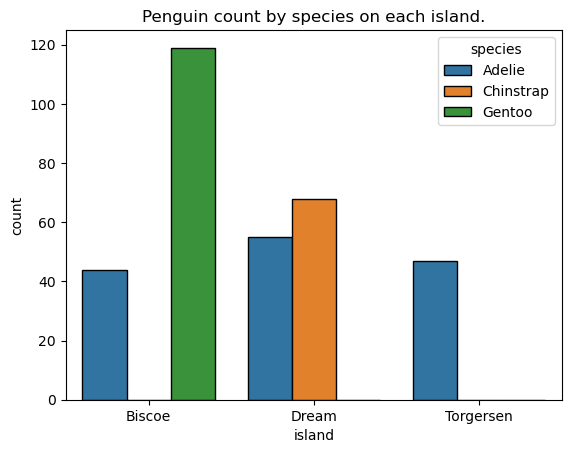

In [46]:
# A breakdown of the penguin population on each island by species.
sns.countplot(df, x = 'island',
            hue = 'species',
            edgecolor = 'black'
            )
plt.title('Penguin count by species on each island.')
plt.show()

__Summary of the penguin population on each island.__

Biscoe is the most populous island with 163 penguins. Torgersen is the least populous island with only 51 penguins of the penguins studied. 

Both Biscoe and Dream have two penguin species present, with only one penguin species present on Torgersen. Adélie penguins were found on all three islands, with Chinstrap and Gentoo found on Dream and Torgersen respectively.

### Histogram of an appropriate variable
***

Task: Make a histogram of an appropriate variable. 

Chosen variable is flipper length. COMMENT ON HISTOGRAMS.

In [ ]:
# Plot of the distribution of flipper length (mm)
plt.hist(np.array(df["flipper_length_mm"]))
plt.xlabel("Flipper length (mm)")
plt.ylabel("Frequency")
plt.title("Distributions of Penguin Flipper Length")
plt.show()

The histogram would be expected to have a normal curve distribution but as we can see it doesn't and has a very unusual shape. Further analysis is required to explain the shape of the histogram.

__Normal Distribution__ADD reference  

* MORE INFORMATION ON NORMAL DISTRIBUTION

![Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Standard_Normal_Distribution.png/320px-Standard_Normal_Distribution.png)





As there are three penguin species, I will now analyse the flipper length for each species to see if that explains the unusual shape of the histogram.

In [ ]:
# Investigating the mean, standard deviation and median of the flipper length for the different penguin species.
df.groupby("species")["flipper_length_mm"].agg([np.mean, np.std, np.median, min, max])

In [ ]:
# Same as above but using pivot_table # Investigating the mean, standard deviation and median of the penguin species
df.pivot_table(values = "flipper_length_mm", index = "species", aggfunc=[np.mean, np.std, np.median])

The above table demonstrates that each of the penguin species have noticeably different flipper lengths. The Gentoo penguins have the largest flippers with the average flipper length of 217mm and a median value of 216mm. The Adelie penguins have the smallest flipper length of 189mm with a median of 190mm.

The bars on the right of the above histogram from approximately 208mm is the distribution of flipper lengths for the Gentoo penguin. The bars on the left are for the overlapping values of the Adelie and Chinstrap penguins.

An improved histogram is required to show the distribution of flipper lengths for the penguin species. 

WHY DID I CHOoSE THIS PARTICULAR PLOT TYPE?

In [ ]:
# Histogram of the variations in flipper length by species.
# This is my histogram for the task.

fig, ax = plt.subplots()
ax.hist(adelie['flipper_length_mm'], label = "Adelie", edgecolor = "black", alpha = 0.5)
ax.hist(chinstrap['flipper_length_mm'], label = "Chinstrap", edgecolor = "black", alpha = 0.5)
ax.hist(gentoo['flipper_length_mm'], label = "Gentoo", edgecolor = "black", alpha = 0.5)
ax.set_title("Variations in flipper length by species")
ax.set_xlabel("Flipper length (mm)")
ax.set_ylabel("No of observations")
ax.legend()
plt.show()

This histogram clearly demonstrates that each species has a distinct flipper size. A larger data set would give a plot be similiar to a standard distribution curve..REPHRASE 

COMMENT REFERING TO RESEARCH. Value of the histograms. 

It would be possible from flipper length to identify a penguin as a Gentoo penguin. It would be more difficult to classify the Adelie and the Chinstrap penguins by their flipper lengths alone as the values overlap.

## Project
***

Select two variables for the data set and provide an analysis of how correlated they are.

### Scatter plot

SCATTER plot comments
My chosen variables are flipper length and body mass.

In [ ]:
# Simple scatter plot to get started of body mass (g) vs flipper length (mm)
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])

# Adding title, x and y labels to the plot.
plt.title('Body mass vs Flipper length')
plt.xlabel('Flipper length (mm)')
plt.ylabel('Body mass (g)')

# Display the plot
plt.show()

__Scatter plot by species__

In [ ]:
# Scatter plot of body mass (g) vs flipper length (mm) by species.
fig, ax = plt.subplots()

ax.scatter(adelie['flipper_length_mm'], adelie['body_mass_g'], label = 'adelie')
ax.scatter(chinstrap['flipper_length_mm'], chinstrap['body_mass_g'], label = 'chinstrap')
ax.scatter(gentoo['flipper_length_mm'], gentoo['body_mass_g'], label = 'gentoo')
ax.set_xlabel('Flipper length (mm)')
ax.set_ylabel('Body masss (g)')
ax.set_title('Body mass vs Flipper length')
ax.legend()
plt.show()

__Scatter plot of body mass vs flipper length by species and sex.__

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

g = sns.relplot(x = 'flipper_length_mm', y = 'body_mass_g', col = 'species', hue = 'sex', data = penguins)
g.fig.suptitle('Comparison of Body mass vs Flipper Length by Species and Sex', y = 1.05)
g.set(xlabel = 'Flipper length (mm)', ylabel = 'Body mass (g)')
plt.show()

### Correlation between body mass and flipper length.
***

The corr() method gives us the correlation coefficient, r, which is a measure of how two numeric variables are linearly related, in other words it measures the strength of the relationship. The values of r are always in the range of -1 to +1. The sign indicates the direction of the relationship, with -1 indicating a strong negative correlation (as x increases, y decreases), 0 indicates no correlation and +1 is a strong positive correlation (as x increases, y increases). 

It is important to always plot the data to visually check that the data has a linear relationship. A scatterplot can indicate if there is a linear relationship, however [seaborn's lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html), which plots a scatterplot with an overlaid trendline, is very useful to check for a linear relationship.

In [ ]:
# Using seaborn lmplot to check that there is a linear relationship
sns.lmplot(x = 'flipper_length_mm', y = 'body_mass_g', data = penguins, ci = None)

# Adding title, x and y labels to the plot.
plt.title('Body mass vs Flipper length')
plt.xlabel('Flipper length (mm)')
plt.ylabel('Body mass (g)')

# Display the plot
plt.show()

As the relationship between body mass and flipper length has a linear relationship, the correlation coefficient can now be calculated. 

In [ ]:
# Correlation between body mass and flipper length.
penguins_corr_fl_bm = penguins['body_mass_g'].corr(penguins['flipper_length_mm'])

print(f'The correlation coefficient between flipper length and body mass for the Adélie penguins is: {penguins_corr_fl_bm.round(3)}.')

__Calculating the correlation between body mass and flipper length by species.__

In [ ]:
# Correlation between body mass and flipper length for Adélie penguins.
adelie_corr_fl_bm = adelie['body_mass_g'].corr(adelie['flipper_length_mm'])

print(f'The correlation coefficient between flipper length and body mass for the Adélie penguins is: {adelie_corr_fl_bm.round(3)}.')

In [ ]:
# Correlation between flipper length and body mass for Chinstrap penguins.
chinstrap_corr_fl_bm = chinstrap['body_mass_g'].corr(chinstrap['flipper_length_mm'])

print(f'The correlation coefficient between flipper length and body mass for the Chinstrap penguins is: {chinstrap_corr_fl_bm.round(3)}.')

In [ ]:
# Correlation between flipper length and body mass for Gentoo penguins.
gentoo_corr_fl_bm = gentoo['body_mass_g'].corr(gentoo['flipper_length_mm'])

print(f'The correlation coefficient between flipper length and body mass for the Gentoo penguins is: {gentoo_corr_fl_bm.round(3)}.')

ADD nice seaborn plot with trend line for the three different species. 

What is the value of the trend line?



__Correlation between flipper length and body mass__

When the overall correlation between flipper length and body mass was calculated it appeared that there is a strong positive correlation with a correlation coefficient value of 0.87.

However, for the individual species the correlation coefficient between flipper length and body mass is lower. Adélie penguins display a moderate correlation with a value of 0.47 and the Gentoo penguins have a stronger correlation coefficient of 0.70. For Chinstrap penguins the value of the correlation coefficient was 0.64.

Out of curiosity I decided to see if there is a strong correlation between any of the variables for the different penguin species.

In [ ]:
# Calculating the correlation between all the variables in the Adélie penguin. 
adelie_corr = adelie.drop(['island', 'sex'], axis = 1).corr().round(3)
adelie_corr

Overall for the Adelie penguin there is a weak to moderate correlation between the different variables. The strongest correlation in the table is between bill depth and body mass at 0.58, with bill length and body mass closely behind it at 0.55. 

While we can read the above table, it is not very visual and it has to be carefully analysed. [Seaborn heatmaps](https://www.datacamp.com/tutorial/seaborn-heatmaps) are a very useful tool to visualise numerical data. The data is organised in a grid by colour, with the colour indicating order of magnitude. It is much easier to identify relationships between the variables of interest. 

As heatmaps require numerical data, the columns for island and sex were dropped for all the species dataframes. To make comparsions between the species easier to identify, the scale of the heatmap was adjusted so that the same colour corresponded to the same order of magnitude in each map. 

In [ ]:
# Heatmap for correlation between all the variables for Adélie penguin.
sns.heatmap(adelie.drop(['island', 'sex'], axis = 1).corr(), annot = True, linewidths = 0.2, vmin = 0.2, vmax = 1)
plt.title('Heatmap for Adelie Penguins', y= 1.02)
plt.show()

In [ ]:
# Heatmap for correlation between all the variables for Chinstrap penguin.
sns.heatmap(chinstrap.drop(['island','sex'], axis = 1).corr(), annot = True, linewidths = 0.2, vmin = 0.2, vmax = 1)
plt.title('Heatmap for Chinstrap Penguins', y= 1.02)
plt.show()

In [ ]:
# Heatmap for correlation between all the variables for Gentoo penguin.
sns.heatmap(gentoo.drop(['island','sex'], axis = 1).corr(), annot = True, linewidths = 0.2, vmin = 0.2, vmax = 1)
plt.title('Heatmap for Gentoo Penguins', y= 1.02)
plt.show()

While a straight comparison appears to be a good correlation but when it is check by species. Poor correlation between body mass and flipper length for adelie penguins. Gentoo has a moderat( check correct term) correlation. 

Study of male vs female within the three different species. How would i plot it?

scatter plot by species male vs female
plot for each of 4 variables. 


[Predicting the sex of penguins using machine learning](https://www.youtube.com/watch?v=euGEsJj-oI4)

In [ ]:
male_adelie = adelie[(adelie['sex'] ==  'Male')]
female_adelie = adelie[(adelie['sex'] ==  'Female')]

male_chinstrap = chinstrap[(chinstrap['sex']) == 'Male']
female_chinstrap = chinstrap[(chinstrap['sex']) == 'Female']

In [ ]:
fig, ax = plt.subplots()

ax.scatter(male_adelie['flipper_length_mm'], male_adelie['body_mass_g'], label = 'Male') 
ax.scatter(female_adelie['flipper_length_mm'], female_adelie['body_mass_g'], label = 'Female')
ax.set_ylabel('Body mass (g)')
ax.set_title('Body Mass vs Flipper Length by Sex for Adelié Penguins')
ax.legend()
plt.show()


In [ ]:
male_adelie['body_mass_g'].corr(male_adelie['flipper_length_mm'])

In [ ]:
female_adelie['body_mass_g'].corr(female_adelie['flipper_length_mm'])

Any differences between the Adelie penguins on the three different islands?

* Adelie penguins live on all three islands, are there any differences in flipper, bills, body mass? 

In [ ]:
adelie.isnull().sum()


In [ ]:
adelie['body_mass_g'].corr(adelie['flipper_length_mm'])

In [ ]:
adelie.groupby('island')['body_mass_g'].mean()

In [ ]:
adelie.groupby('island')['body_mass_g'].mean().std()

** Investigating the Penguin Species.

In [ ]:
regression plot

sns.regplot(x = 'flipper_length_mm', y = 'body_mass_g', data = penguins, ci = None)

In [ ]:
df.groupby('species').count()

* Some information on the sex of the penguin is missing for some penguins. Could I predict whether they are male or female based on the other traits. 

Gentoo penguins, missing sex data. Can I tell if guess(?, need better word, if they are male or female.)

1st get the missing rows.

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081#s4
Estimates of penguin SSD have generally relied on one or only a few morphological features. Williams [67] used bill length and depth to assess structural size differences between male and female gentoo penguins. Fairbairn and Shine [51] relied on published estimates of body mass for 17 species of Spheniscidae in their meta-analysis of seabird SSD, while Polito et al. [66] considered measurements of bill features only for developing SSD indices for Pygoscelis penguins. The evolution of SSD is primarily considered a result of sexual and/or fecundity selection [6], therefore, it is highly likely that several traits are under selection that result in overall body size differences between the sexes. To this end, we considered a suite of morphological features in our analyses similar to Bertellotti et al. [61], to more broadly assess SSD in Pygoscelis penguins. We recognize that body mass is a plastic trait that can vary over the annual cycle, therefore, our body mass results are truly only relevant for individuals during the egg laying period and should not be considered representative of individuals during other seasonal phases such as chick rearing or outside the breeding season.

Our results demonstrate inter-specific differences in best morphological predictors of sex among Pygoscelis penguins. Adélie penguin body mass and culmen length were the strongest predictors of sex, while body mass and culmen depth were best predictors of male and female gentoo penguins. For chinstrap penguins, body mass was the least predictive structural feature, while culmen length and depth were similarly strong predictors of sex. Species-specific models based on these best morphological predictors correctly classified a high percentage of individuals from independent datasets (i.e., 89–94%). Interestingly, flipper length was not a strong predictor of sex for any of the three species. Culmen features and body mass are structures important during penguin courtship [52], and therefore, likely targets of sexual selection, which may be why these parameters are strong predictors of sex across Pygoscelis species. Similar results were found by Bertellotti et al. [61] who included bill depth and length, but not flipper length, of Magellanic penguins (Spheniscus magellanicus) in a discriminant function that correctly classified 97% of adults.

Variation in our calculated size dimorphism indices generally reflected differences in best morphological predictors of adult penguin sex discussed above, which would be expected. Size dimorphism indices for Adélie penguin body mass and culmen length were the largest of those calculated for the species. Similarly, SDIs for gentoo penguin body mass and culmen depth were the largest calculated. Culmen length and depth of chinstrap penguins were equally strong predictors of sex, but associated SDIs were similar to the index for body mass, which was the least predictive structural feature for male and female chinstrap penguins. The overall average SDI, based on all four parameters, indicated that Adélie and gentoo penguins hold the same levels of SSD, while chinstrap penguins are slightly less dimorphic. However, when excluding body mass from these calculations by considering only culmen and flipper features, the overall average SDI suggested that chinstrap penguins were most sexually dimorphic, followed by gentoo penguins, with Adélie penguins being the least dimorphic of all three species. Body mass variation is closely coupled with the seasonal energetic requirements of migration, reproduction, and molt, therefore, the overall average SDI calculated that excludes body mass is a more robust estimate of SSD that is relevant throughout the annual cycle. Within this context, although based on a different SDI, our results corroborate those by Polito et al. [66] suggesting that chinstrap penguins are the most sexually size dimorphic Pygoscelis species based on bill features only.


In [ ]:
gentoo[gentoo.isnull().any(axis = 1)]

In [ ]:
sns.pairplot(gentoo, hue = 'sex')

In [ ]:
df.groupby('island')['body_mass_g'].mean()


In [ ]:
df.groupby('species')['body_mass_g'].mean()

In [ ]:
# Number and sex of penguins
df["sex"].value_counts()

[Get started with tidymodels and classification of penguin data](https://www.youtube.com/watch?v=z57i2GVcdww)

Random references that I don't know where to put yet!

Getting started with streamlit for data science: Create and deplot Streamlit web applicatsin from scratch in python
https://books.google.ie/books?hl=en&lr=&id=9804EAAAQBAJ&oi=fnd&pg=PP1&dq=penguins+dataset+palmer&ots=qngv9JPI9O&sig=77XKyU2mgdUO3LI8jw4cRn5ZKL0&redir_esc=y#v=onepage&q=penguins%20dataset%20palmer&f=false


https://towardsdatascience.com/penguins-dataset-overview-iris-alternative-9453bb8c8d95 exploratory data analysis

https://github.com/mcnakhaee/palmerpenguins

[EDA and K-means model with python](https://www.kaggle.com/code/theerachodsepdham/eda-k-means-model-with-python?scriptVersionId=169589012)  build a machine learning model for predicting penguin species. 

https://deepnote.com/app/mazzaroli/Exploratory-Data-Analysis-to-Predictive-analysis-Palmer-Penguins-e6bd8932-9ca1-4363-b78a-79f4f4dc818f Exploratory Data analysis to predictive analysis

## Brainstorm

WHat two variables could I compare?

* Do heavier penguins have longer flippers or bill length?
* Bigger bills, bigger body mass? Bigger bills can eat more? 
* 


In [ ]:
df.groupby("species").agg({"flipper_length_mm": 'mean', 'bill_length_mm' : 'mean', 'bill_depth_mm' : 'mean', 'body_mass_g' : 'mean'})

In [ ]:
# Are male penguins heavier than female penguins?

df.groupby('sex')['body_mass_g'].mean()

https://www.neuraldesigner.com/learning/examples/palmer-penguins/

### Additional References

[Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)

__Images in markdown__

To insert images in markdown the following is used: 
```
![Text](link to image)
```

 However, it is difficult to resize images in markdown as it has no sizing parameters so inserting the image using html can sometimes be preferable. [w3schools](https://www.w3schools.com/html/html_images.asp) has a straight forward lesson on how to insert images using html. 

```html
<img src="image.png" alt="image" style = "width:600px; height=auto">
```


[Common pitfalls in statistical analysis: The use of correlation techniques](nlm.nih.gov/pmc/articles/PMC5079093/).

[How to calculate correlation between two columns in Pandas](]https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/)

__Plotting images__

Datacamp [Introduction to Data Visualization with Matplotlib](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-matplotlib)

Datacamp [Data Manipulation with Pandas](https://app.datacamp.com/learn/courses/data-manipulation-with-pandas)

Datacamp [Introduction to Data Visualization with Seaborn](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-seaborn)


## End

***